In [53]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


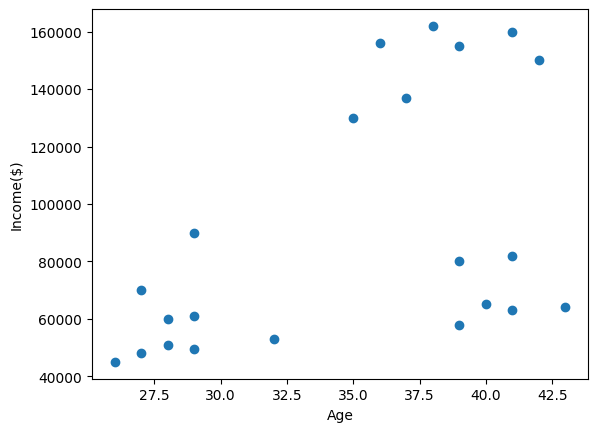

In [54]:
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.scatter(df["Age"],df["Income($)"])

In [55]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [56]:
y_predicted = km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [57]:
df["cluster"] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


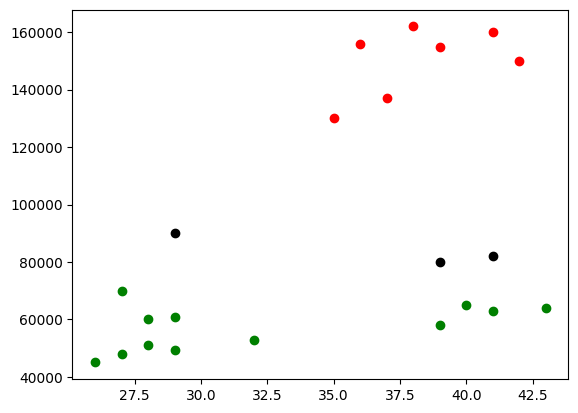

In [58]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1["Age"],df1["Income($)"],color="green")
plt.scatter(df2["Age"],df2["Income($)"],color="red")
plt.scatter(df3["Age"],df3["Income($)"],color="black")

In [59]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,70000,0
1,Michael,0.176471,90000,2
2,Mohan,0.176471,61000,0
3,Ismail,0.117647,60000,0
4,Kory,0.941176,150000,1


In [60]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [61]:
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[["Age","Income($)"]])
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [62]:
df["cluster"]=y_predict

In [63]:
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [64]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

C:\Users\niraj.meshram\AppData\Local\Temp\ipykernel_3224\4049268980.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


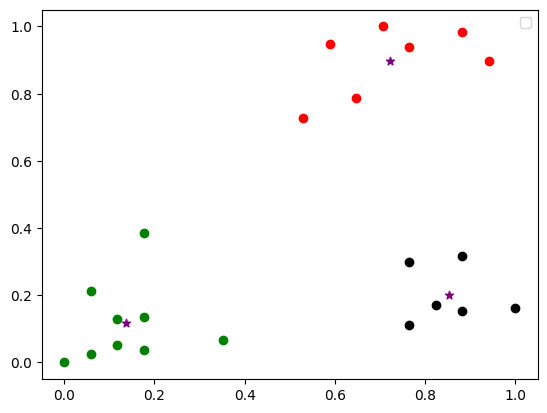

In [65]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

plt.scatter(df1["Age"],df1["Income($)"],color="green")
plt.scatter(df2["Age"],df2["Income($)"],color="red")
plt.scatter(df3["Age"],df3["Income($)"],color="black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker="*",color="purple")
plt.legend()

In [50]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

In [51]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.33956681023883983,
 0.23844880713540698,
 0.21446438422046923,
 0.15205897076959982,
 0.11107177965486903]

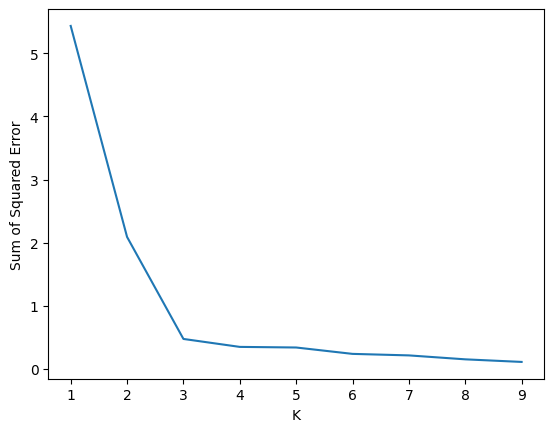

In [52]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse)